In [1]:
#| code-summary: Load Packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [2]:
#| echo: false
from IPython.display import display, HTML
HTML('<style>.output {flex-direction: row;}</style>')
pd.options.display.notebook_repr_html = False

In [3]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

Tidy data의 요건

1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.

![](images/tidydata.png){width=700}

아래의 데이터는 모두 같은 4가지 정보, country, year, cases, population을 담고 있으나 table1만 tidy

In [4]:
table1 = sm.datasets.get_rdataset("table1", "tidyr").data
table1 # tidy data

       country  year   cases  population
0  Afghanistan  1999     745    19987071
1  Afghanistan  2000    2666    20595360
2       Brazil  1999   37737   172006362
3       Brazil  2000   80488   174504898
4        China  1999  212258  1272915272
5        China  2000  213766  1280428583

In [5]:
table2 = sm.datasets.get_rdataset("table2", "tidyr").data
table2

        country  year        type       count
0   Afghanistan  1999       cases         745
1   Afghanistan  1999  population    19987071
2   Afghanistan  2000       cases        2666
..          ...   ...         ...         ...
9         China  1999  population  1272915272
10        China  2000       cases      213766
11        China  2000  population  1280428583

[12 rows x 4 columns]

In [6]:
table3 = sm.datasets.get_rdataset("table3", "tidyr").data
table3

       country  year               rate
0  Afghanistan  1999       745/19987071
1  Afghanistan  2000      2666/20595360
2       Brazil  1999    37737/172006362
3       Brazil  2000    80488/174504898
4        China  1999  212258/1272915272
5        China  2000  213766/1280428583

In [7]:
table4a = sm.datasets.get_rdataset("table4a", "tidyr").data
table4a

       country    1999    2000
0  Afghanistan     745    2666
1       Brazil   37737   80488
2        China  212258  213766

In [8]:
table4b = sm.datasets.get_rdataset("table4b", "tidyr").data
table4b

       country        1999        2000
0  Afghanistan    19987071    20595360
1       Brazil   172006362   174504898
2        China  1272915272  1280428583

기본적으로 table1의 형태일 때, 효과적으로 데이터를 다룰 수 있음

In [13]:
# Compute rate per 10,000
table1.assign(
    rate = lambda x: x.cases / x.population * 100000
)

       country  year   cases  population  rate
0  Afghanistan  1999     745    19987071  3.73
1  Afghanistan  2000    2666    20595360 12.94
2       Brazil  1999   37737   172006362 21.94
3       Brazil  2000   80488   174504898 46.12
4        China  1999  212258  1272915272 16.67
5        China  2000  213766  1280428583 16.69

In [14]:
# Compute cases per year
table1.groupby("year")["cases"].sum()

year
1999    250740
2000    296920
Name: cases, dtype: int64

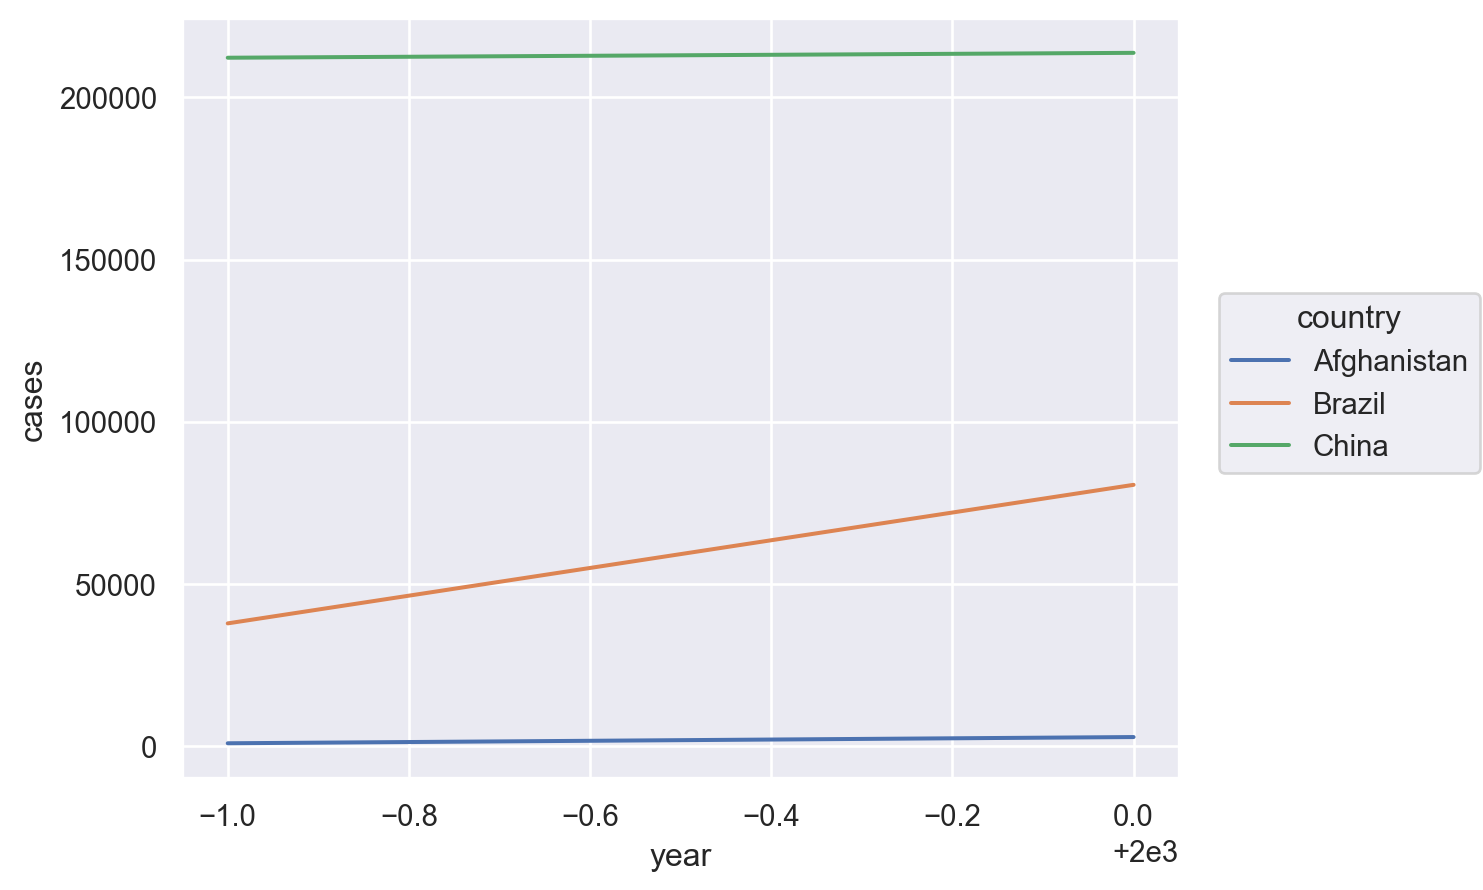

In [15]:
# Visualise changes over time
(
    so.Plot(table1, x="year", y="cases")
    .add(so.Line(), color="country")
)

## Long Form
`melt()`  
`stack()`: index에 적용

In [36]:
table4a

       country    1999    2000
0  Afghanistan     745    2666
1       Brazil   37737   80488
2        China  212258  213766

![](images/melt.png){width=700}

In [37]:
table4a.melt(id_vars="country")  # pd.melt(table4a, id_vars="country")

       country variable   value
0  Afghanistan     1999     745
1       Brazil     1999   37737
2        China     1999  212258
3  Afghanistan     2000    2666
4       Brazil     2000   80488
5        China     2000  213766

::: {.callout-note}
`stack()`은 index를 이용해 long form으로 변환시켜 줌
```python
table4a.set_index("country").stack()  # Series
# country          
# Afghanistan  1999       745
#              2000      2666
# Brazil       1999     37737
#              2000     80488
# China        1999    212258
#              2000    213766
# dtype: int64

table4a.set_index("country").stack().unstack(level=0)
# country  Afghanistan  Brazil   China
# 1999             745   37737  212258
# 2000            2666   80488  213766
```
:::

In [38]:
table4a_long = table4a.melt(id_vars="country", var_name="year", value_name="cases")
table4a_long

       country  year   cases
0  Afghanistan  1999     745
1       Brazil  1999   37737
2        China  1999  212258
3  Afghanistan  2000    2666
4       Brazil  2000   80488
5        China  2000  213766

In [42]:
table4b

       country        1999        2000
0  Afghanistan    19987071    20595360
1       Brazil   172006362   174504898
2        China  1272915272  1280428583

In [43]:
table4b_long = table4b.melt(
    id_vars="country", 
    var_name="year", 
    value_name="population", 
    value_vars=["1999", "2000"] # specify value variables
) 
table4b_long

       country  year  population
0  Afghanistan  1999    19987071
1       Brazil  1999   172006362
2        China  1999  1272915272
3  Afghanistan  2000    20595360
4       Brazil  2000   174504898
5        China  2000  1280428583

In [44]:
pd.merge(table4a_long, table4b_long) # keys: "country" & "year"

       country  year   cases  population
0  Afghanistan  1999     745    19987071
1       Brazil  1999   37737   172006362
2        China  1999  212258  1272915272
3  Afghanistan  2000    2666    20595360
4       Brazil  2000   80488   174504898
5        China  2000  213766  1280428583

## Wide Format
`pivot()`  
`unstack()`: index에 적용

In [9]:
table2

        country  year        type       count
0   Afghanistan  1999       cases         745
1   Afghanistan  1999  population    19987071
2   Afghanistan  2000       cases        2666
..          ...   ...         ...         ...
9         China  1999  population  1272915272
10        China  2000       cases      213766
11        China  2000  population  1280428583

[12 rows x 4 columns]

![](images/pivot.png){width=700}

In [10]:
table2.pivot(index=["country", "year"], columns="type", values="count")

type               cases  population
country     year                    
Afghanistan 1999     745    19987071
            2000    2666    20595360
Brazil      1999   37737   172006362
            2000   80488   174504898
China       1999  212258  1272915272
            2000  213766  1280428583

::: {.callout-note}
`unstack()`은 index를 이용해 wide form으로 변환시켜 줌  
맨 안쪽 index level (level=2)에 default로 적용
```python
table2.set_index(["country", "year", "type"]).unstack() 
#                    count            
# type               cases  population
# country     year                    
# Afghanistan 1999     745    19987071
#             2000    2666    20595360
# Brazil      1999   37737   172006362
#             2000   80488   174504898
# China       1999  212258  1272915272
#             2000  213766  1280428583
```
:::


::: {.callout-note}
`stack()`, `unstack()`에 대한 자세한 사항은 책을 참고: [8.3 Reshaping and Pivoting in McKinney's](https://wesmckinney.com/book/data-wrangling.html#prep_reshape)
:::

## Separating and uniting

In [26]:
table3

       country  year               rate
0  Afghanistan  1999       745/19987071
1  Afghanistan  2000      2666/20595360
2       Brazil  1999    37737/172006362
3       Brazil  2000    80488/174504898
4        China  1999  212258/1272915272
5        China  2000  213766/1280428583

rate에 있는 case와 population 정보를 분리

In [27]:
table3["rate"].str.split("/", expand=True)

        0           1
0     745    19987071
1    2666    20595360
2   37737   172006362
3   80488   174504898
4  212258  1272915272
5  213766  1280428583

In [28]:
table3[["cases", "population"]] = \
    table3.pop("rate").str.split("/", expand=True) # pop: 제거와 선택 동시
table3 

       country  year   cases  population
0  Afghanistan  1999     745    19987071
1  Afghanistan  2000    2666    20595360
2       Brazil  1999   37737   172006362
3       Brazil  2000   80488   174504898
4        China  1999  212258  1272915272
5        China  2000  213766  1280428583

year를 앞 두자리와 뒤 두자리를 나눔

::: {.callout-note}
Regular expression등의 string manipulation에 대해서는  

- [A Whirlwind Tour of Python by Jake VanderPlas](https://jakevdp.github.io/WhirlwindTourOfPython/14-strings-and-regular-expressions.html)
- [Python for Data Analysis by Wes McKinney](https://wesmckinney.com/book/data-cleaning.html#text_string_manip)  
:::

In [29]:
table3["year"].astype("string").str.extract(r'(\d{2})(\d{2})')

    0   1
0  19  99
1  20  00
2  19  99
3  20  00
4  19  99
5  20  00

In [30]:
table5 = table3.copy()

In [31]:
table5[["century", "year"]] = table3["year"].astype("string").str.extract(r'(\d{2})(\d{2})')

In [32]:
table5

       country year   cases  population century
0  Afghanistan   99     745    19987071      19
1  Afghanistan   00    2666    20595360      20
2       Brazil   99   37737   172006362      19
3       Brazil   00   80488   174504898      20
4        China   99  212258  1272915272      19
5        China   00  213766  1280428583      20

다시 `century`와 `year` 합치기

In [33]:
table5["century"].str.cat(table5["year"])

0    1999
1    2000
2    1999
3    2000
4    1999
5    2000
Name: century, dtype: string